## Import libraries and datasets 

In [1]:
# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Path to folder
path = r'C:\Users\Kripamahesh\Documents\Achievement 6 Task 6.1'

In [3]:
# Import dataset
df_clean=pd.read_csv(os.path.join(path, '02.DATA', 'chocolate_bar_rates.csv'))

### Step 3 : clean the data 

In [4]:
df_clean.head()

,Unnamed: 0,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [5]:
# drop unnamed column

df_clean = df_clean.drop(columns =['Unnamed: 0'])

In [6]:
# missing values 
df_clean.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

#### No changes made 

In [7]:
# duplicate checks 
dups=df_clean.duplicated()

#### No duplicates

In [8]:
dups.shape

(2530,)

### Step 4: Explore the data visually (scatterplot)

<Axes: xlabel='cocoa_percent', ylabel='rating'>

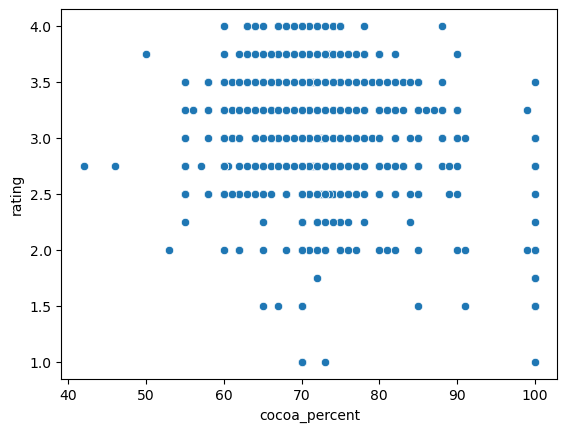

In [16]:
# Scatterplot 

sns.scatterplot(x= 'cocoa_percent', y= 'rating', data= df_clean)

### Step 6 Reshape the variables into Numpy arrays

In [26]:
# Reshape the variables 

X=df_clean['cocoa_percent'].values.reshape(-1,1)
y=df_clean['rating'].values.reshape(-1,1)

In [27]:
X

array([[76.],
       [76.],
       [76.],
       ...,
       [75.],
       [70.],
       [72.]])

In [28]:
y

array([[3.25],
       [3.5 ],
       [3.75],
       ...,
       [3.  ],
       [3.25],
       [3.5 ]])

### Step 7: Split the datas : training set and test set

In [29]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Step 8:  Run a Linear Regression

In [30]:
# create a regression object

regression= LinearRegression()

In [32]:
# Fit the regression object on the training set 

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

### Step 9: Create a plot shows the regression line on test set

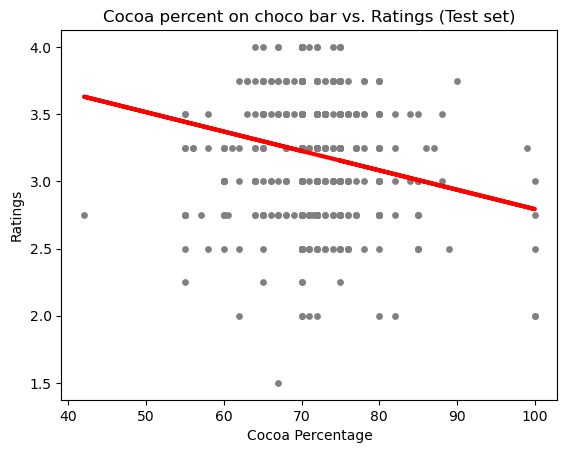

In [35]:
# create a plot 

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa percent on choco bar vs. Ratings (Test set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Ratings')
plot_test.show()

### Step 10: Interpretation how the line fits 
#### Observation: the line does not fit well 

### Step 11:  Model performance statistics - MSE ans R2

In [36]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [37]:
# print the model statistics 

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01442826]]
Mean squared error:  0.17510990179713706
R2 score:  -0.012424664286718734


### Step 12 compare the y values with actual y values in a datafram 

In [38]:
y_predicted

array([[3.22595859],
       [3.22595859],
       [3.25481511],
       [3.34138468],
       [3.22595859],
       [3.22595859],
       [3.22595859],
       [3.26924337],
       [3.22595859],
       [3.19710207],
       [2.79311074],
       [3.22595859],
       [3.12496076],
       [3.22595859],
       [2.79311074],
       [3.22595859],
       [3.00953467],
       [3.2980999 ],
       [3.22595859],
       [3.22595859],
       [3.08167597],
       [3.22595859],
       [3.05281945],
       [3.22595859],
       [3.22595859],
       [3.22595859],
       [3.22595859],
       [3.22595859],
       [3.1826738 ],
       [3.22595859],
       [3.15381728],
       [3.19710207],
       [3.15381728],
       [3.1826738 ],
       [3.15381728],
       [3.2980999 ],
       [3.22595859],
       [3.22595859],
       [3.22595859],
       [3.22595859],
       [3.1105325 ],
       [3.08167597],
       [3.22595859],
       [3.19710207],
       [3.22595859],
       [3.22595859],
       [3.13938902],
       [3.269

In [39]:
# create a dataframe comparing the actual and predicted y values 

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.75,3.225959
1,2.75,3.225959
2,2.75,3.254815
3,3.00,3.341385
4,3.25,3.225959
5,3.75,3.225959
6,3.25,3.225959
7,2.75,3.269243
8,3.00,3.225959
9,3.75,3.197102


### Step 13: Thoughts on the model performed and any reflections on the impact of possible data bias
##### Observation:  MSE value is not very high and R2 score is low(negative) which the model fits worse.  There could be a data bias in the dataset of chocolate bars as it totally depends on persons, occasion, situation and moods os the individual.